# Representación de Imagenes Digitales


In [ ]:
# Librerias
from skimage import data
import cv2
import matplotlib.pyplot as plt
import requests
import numpy as np

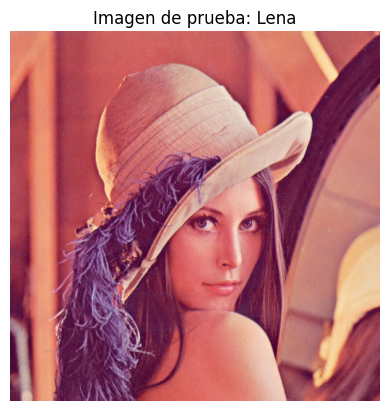

In [ ]:
# Leer imagen desde una URL
url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Read the image from the downloaded content
    image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

    # Convertir de BGR (OpenCV) a RGB (Matplotlib)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image_rgb)
    plt.title('Imagen de prueba: Lena')
    plt.axis('off')
    plt.show()
else:
    print(f"Failed to download image from {url}. Status code: {response.status_code}")

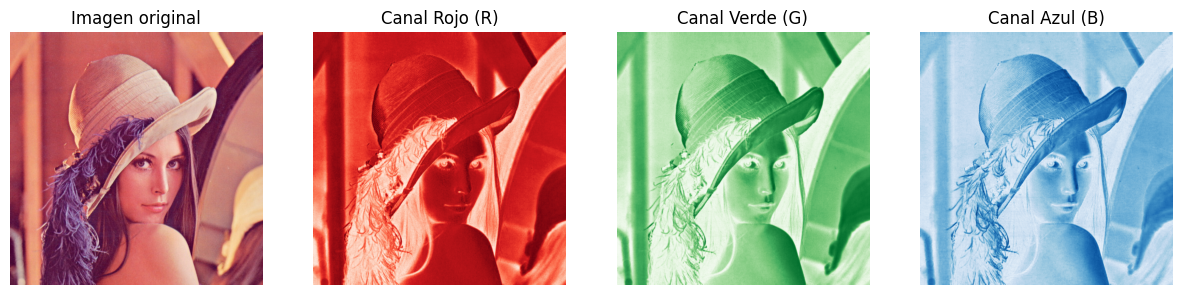

In [ ]:
# Separar los canales R, G, B
R, G, B = cv2.split(image_rgb)

# Mostrar la imagen original y los 3 canales
fig, axs = plt.subplots(1, 4, figsize=(15,5))

axs[0].imshow(image_rgb)
axs[0].set_title("Imagen original")
axs[0].axis('off')

axs[1].imshow(R, cmap='Reds')
axs[1].set_title("Canal Rojo (R)")
axs[1].axis('off')

axs[2].imshow(G, cmap='Greens')
axs[2].set_title("Canal Verde (G)")
axs[2].axis('off')

axs[3].imshow(B, cmap='Blues')
axs[3].set_title("Canal Azul (B)")
axs[3].axis('off')

plt.show()

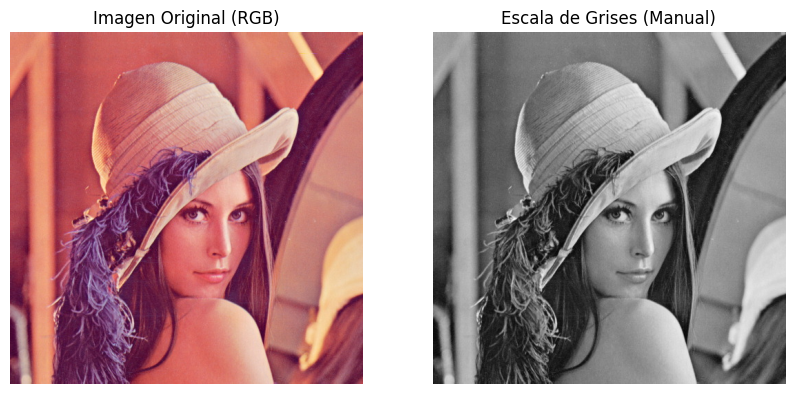

In [ ]:
grayscale = (0.299 * R + 0.587 * G + 0.114 * B).astype(np.uint8)

# Mostrar la imagen original y la imagen en grises
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(image_rgb)
axs[0].set_title("Imagen Original (RGB)")
axs[0].axis('off')

axs[1].imshow(grayscale, cmap='gray')
axs[1].set_title("Escala de Grises (Manual)")
axs[1].axis('off')

plt.show()

In [ ]:
print("Dimensiones de la imagen original:", image_rgb.shape)
print("Dimensiones de la imagen en el canal R:", R.shape)
print("Dimensiones de la imagen en el canal G:", G.shape)
print("Dimensiones de la imagen en el canal B:", B.shape)
print("Dimensiones de la imagen en escala de grises:", grayscale.shape)

Dimensiones de la imagen original: (512, 512, 3)
Dimensiones de la imagen en el canal R: (512, 512)
Dimensiones de la imagen en el canal G: (512, 512)
Dimensiones de la imagen en el canal B: (512, 512)
Dimensiones de la imagen en escala de grises: (512, 512)


# Operaciones Básicas en Imágenes


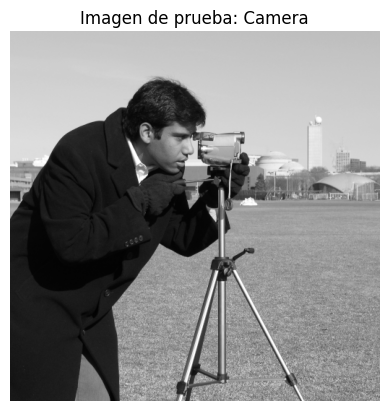

In [ ]:
# Cargar imagen de prueba
image = data.camera()  # Imagen en escala de grises (512x512)

# Mostrar
plt.imshow(image, cmap='gray')
plt.title('Imagen de prueba: Camera')
plt.axis('off')
plt.show()

array([[200, 200, 200, ..., 189, 190, 190],
       [200, 199, 199, ..., 190, 190, 190],
       [199, 199, 199, ..., 190, 190, 190],
       ...,
       [ 25,  25,  27, ..., 139, 122, 147],
       [ 25,  25,  26, ..., 158, 141, 168],
       [ 25,  25,  27, ..., 151, 152, 149]], dtype=uint8)
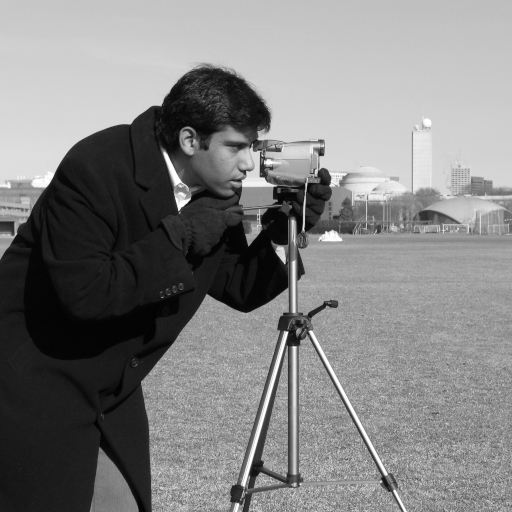

In [ ]:
image

In [ ]:
image.shape

(512, 512)

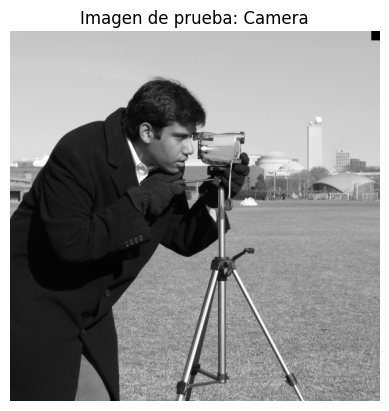

In [ ]:
# Crear cuadrado negro en la esquina superior derecha
for i in range(image.shape[0]):
  if i <= 12:
    for j in range(image.shape[1]):
      if j >= 500:
        image[i,j] = 0

# Mostrar
plt.imshow(image, cmap='gray')
plt.title('Imagen de prueba: Camera')
plt.axis('off')
plt.show()

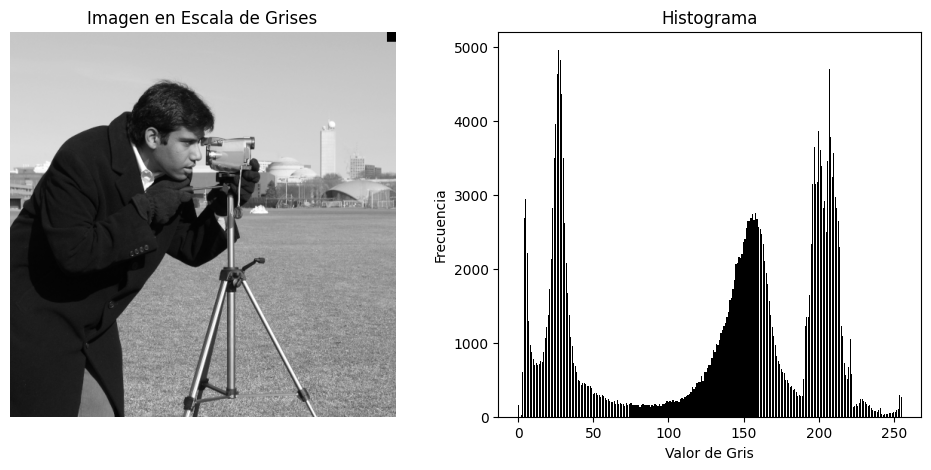

In [ ]:
# Crear un array vacío para el histograma
histogram = np.zeros(256)  # 256 niveles de gris (0-255)

# Contar la frecuencia de cada valor de gris
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        pixel_value = image[i, j]
        histogram[pixel_value] += 1

# Mostrar la imagen en grises y su histograma
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Imagen en grises
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Imagen en Escala de Grises")
axs[0].axis('off')

# Histograma
axs[1].bar(range(256), histogram, color='black')
axs[1].set_title("Histograma")
axs[1].set_xlabel("Valor de Gris")
axs[1].set_ylabel("Frecuencia")

plt.show()

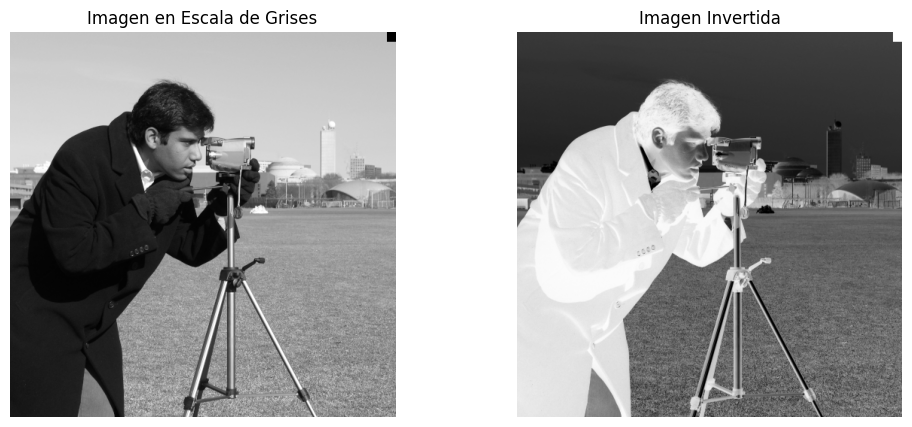

In [ ]:
# Inversión
inverted = np.zeros_like(image)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        inverted[i, j] = 255 - image[i, j]

# Mostrar la imagen en grises y su histograma
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Imagen en grises
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Imagen en Escala de Grises")
axs[0].axis('off')

# Imagen invertida
axs[1].imshow(inverted, cmap='gray')
axs[1].set_title("Imagen Invertida")
axs[1].axis('off')

plt.show()


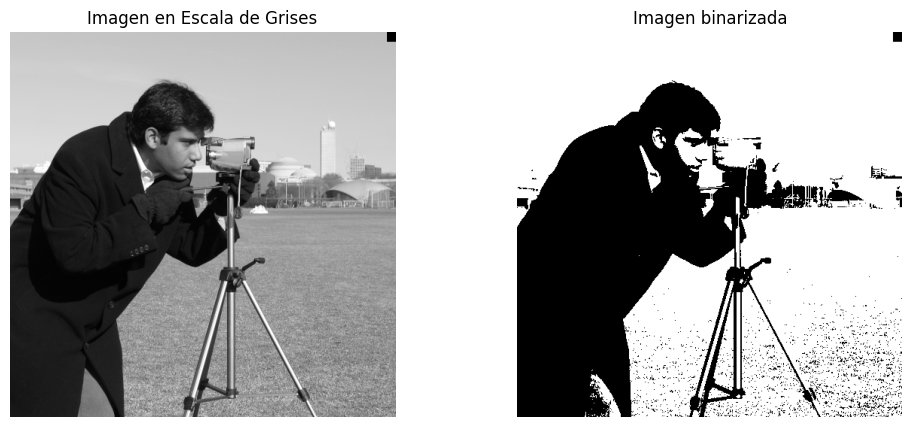

In [ ]:
# Umbralización y binarización
threshold = 125  # Umbral
threshol2 = 100  # Umbral


bin = np.zeros_like(image)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):

        if image[i, j] > threshold:
            bin[i, j] = 255
        # elif image [i,j] > threshol2:
        #    bin[i, j] = 100
        else:
            bin[i, j] = 0

# Mostrar
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Imagen en grises
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Imagen en Escala de Grises")
axs[0].axis('off')

# Imagen binarizada
axs[1].imshow(bin, cmap='gray')
axs[1].set_title("Imagen binarizada")
axs[1].axis('off')

plt.show()

In [ ]:
def Erosionar(image_in, kernel_size = 3):
  kernel = np.ones((kernel_size, kernel_size))

  padded_bin = np.pad(image_in, 1, mode='constant', constant_values=0) # Añade un pixel en el borde
  e_img = np.zeros_like(image_in)

  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      # Extrae una muestra de 3x3 de la imagen con padding
      neighborhood = padded_bin[i:i+kernel.shape[0], j:j+kernel.shape[1]]
      value = np.sum(neighborhood * kernel)
      if value == 9*255:
        e_img[i, j] = 255
      else:
        e_img[i, j] = 0

  return e_img



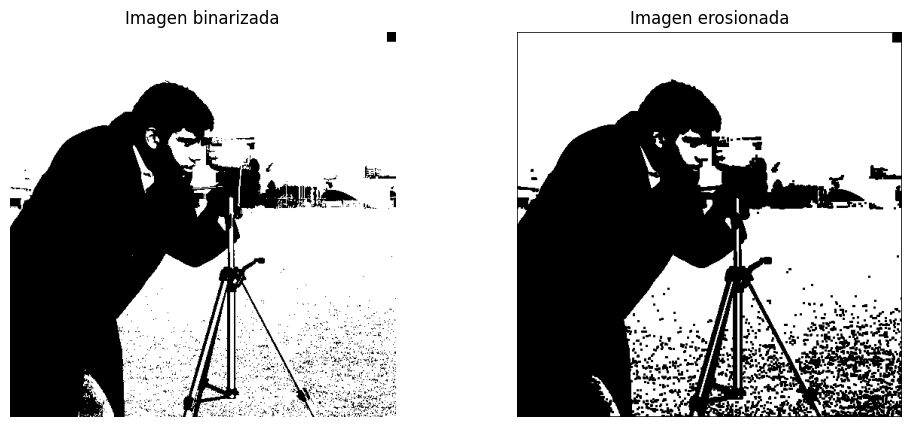

In [ ]:

erosion = Erosionar(bin)
# Mostrar
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Imagen en grises
axs[0].imshow(bin, cmap='gray')
axs[0].set_title("Imagen binarizada")
axs[0].axis('off')

# Imagen binarizada
axs[1].imshow(erosion, cmap='gray')
axs[1].set_title("Imagen erosionada")
axs[1].axis('off')

plt.show()

In [ ]:
def Dilatar(image_in, kernel_size = 3):
  kernel = np.ones((kernel_size, kernel_size))

  padded_bin = np.pad(image_in, 1, mode='constant', constant_values=0) # Añade un pixel en el borde
  d_img = np.zeros_like(image_in)

  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      # Extrae una muestra de 3x3 de la imagen con padding
      neighborhood = padded_bin[i:i+kernel.shape[0], j:j+kernel.shape[1]]
      value = np.sum(neighborhood * kernel)
      if value >= 255:
        d_img[i, j] = 255
      else:
        d_img[i, j] = 0

  return d_img

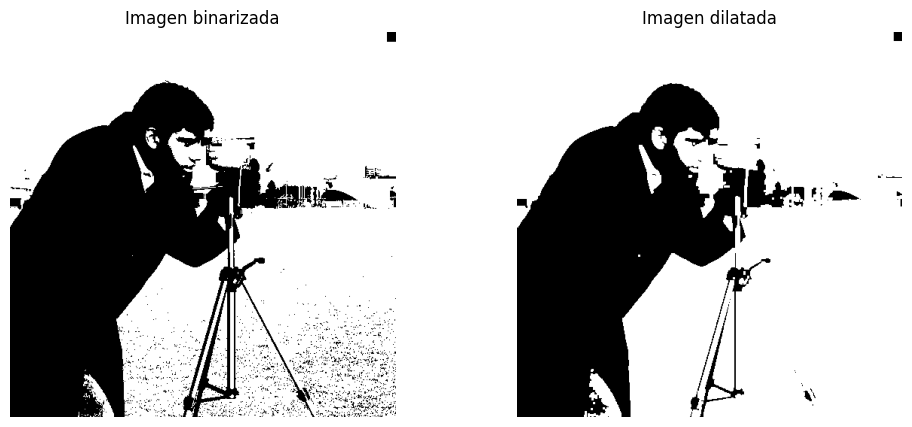

In [ ]:
# Dilatación
dilatado = Dilatar(bin)

# Mostrar
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Imagen en grises
axs[0].imshow(bin, cmap='gray')
axs[0].set_title("Imagen binarizada")
axs[0].axis('off')

# Imagen dilatada
axs[1].imshow(dilatado, cmap='gray')
axs[1].set_title("Imagen dilatada")
axs[1].axis('off')

plt.show()

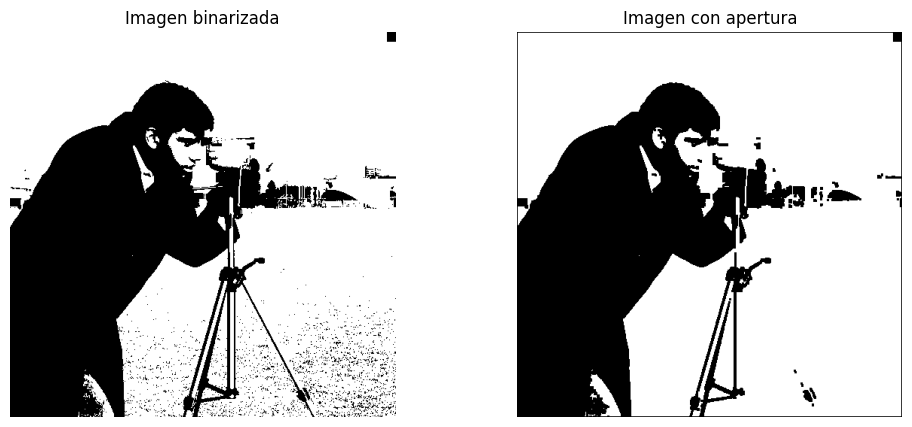

In [ ]:
# Apertura
apertura = Dilatar(bin)
apertura = Erosionar(apertura)


# Mostrar
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Imagen en grises
axs[0].imshow(bin, cmap='gray')
axs[0].set_title("Imagen binarizada")
axs[0].axis('off')

# Imagen con apertura
axs[1].imshow(apertura, cmap='gray')
axs[1].set_title("Imagen con apertura")
axs[1].axis('off')

plt.show()


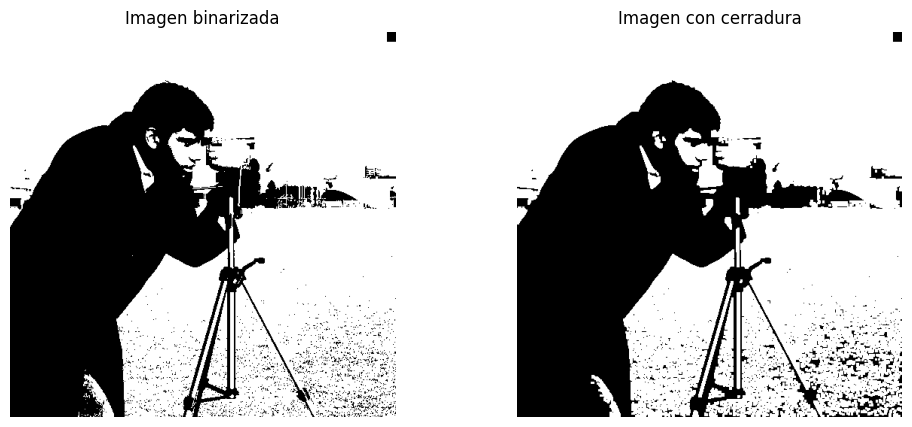

In [ ]:
# Cerradura
cerradura = Erosionar(bin)
cerradura = Dilatar(cerradura)

# Mostrar
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Imagen en grises
axs[0].imshow(bin, cmap='gray')
axs[0].set_title("Imagen binarizada")
axs[0].axis('off')

# Imagen dilatada
axs[1].imshow(cerradura, cmap='gray')
axs[1].set_title("Imagen con cerradura")
axs[1].axis('off')

plt.show()

# Filtros y Transformaciones Espaciales

In [ ]:
# Convolución en 2D.
def K_convolucion(img, kernel, padding=1):

  padded_img = np.pad(img, padding, mode='constant', constant_values=0)
  new_img = np.zeros_like(img)

  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      # Extrae una muestra de la imagen con padding
      neighborhood = padded_img[i:i+kernel.shape[0], j:j+kernel.shape[1]]

      # Aplicamos el kernel
      value = np.sum(neighborhood * kernel)
      new_img[i, j] = value

  return new_img

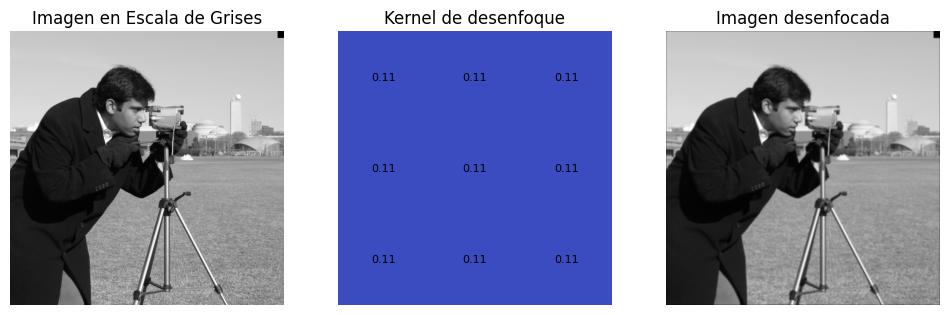

In [ ]:
# Kernel de desenfoque (mean filter)
kernel_blur = (1/9) * np.ones((3,3))
imagen_desenfocada = K_convolucion(image, kernel_blur)


# Mostrar
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Imagen en grises
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Imagen en Escala de Grises")
axs[0].axis('off')

# kernel
axs[1].imshow(kernel_blur, cmap='coolwarm', interpolation='nearest')
axs[1].set_title("Kernel de desenfoque")
for (j,i),label in np.ndenumerate(kernel_blur):
    axs[1].text(i, j, f"{label:.2f}", ha='center', va='center', color='black', fontsize=8)
axs[1].axis('off')

# Imagen procesada
axs[2].imshow(imagen_desenfocada, cmap = 'gray')
axs[2].set_title("Imagen desenfocada")
axs[2].axis('off')

plt.show()

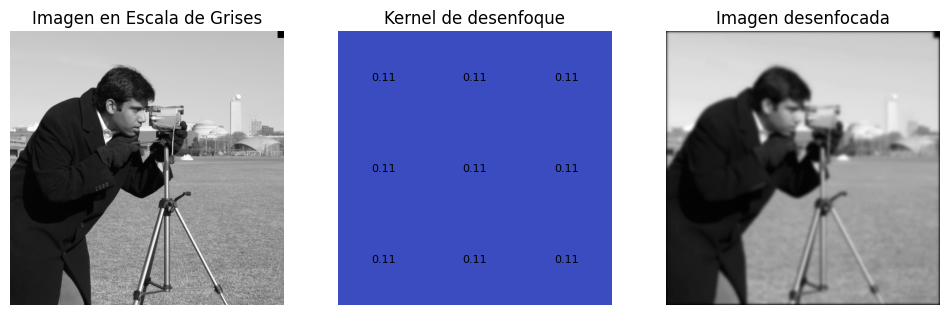

In [ ]:
# Kernel de desenfoque (mean filter)
kernel_blur = (1/9) * np.ones((3,3))
iter = 10
for i in range(iter):
  imagen_desenfocada = K_convolucion(imagen_desenfocada, kernel_blur)

# Mostrar
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Imagen en grises
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Imagen en Escala de Grises")
axs[0].axis('off')

# kernel
axs[1].imshow(kernel_blur, cmap='coolwarm', interpolation='nearest')
axs[1].set_title("Kernel de desenfoque")
for (j,i),label in np.ndenumerate(kernel_blur):
    axs[1].text(i, j, f"{label:.2f}", ha='center', va='center', color='black', fontsize=8)
axs[1].axis('off')

# Imagen procesada
axs[2].imshow(imagen_desenfocada, cmap = 'gray')
axs[2].set_title("Imagen desenfocada")
axs[2].axis('off')

plt.show()

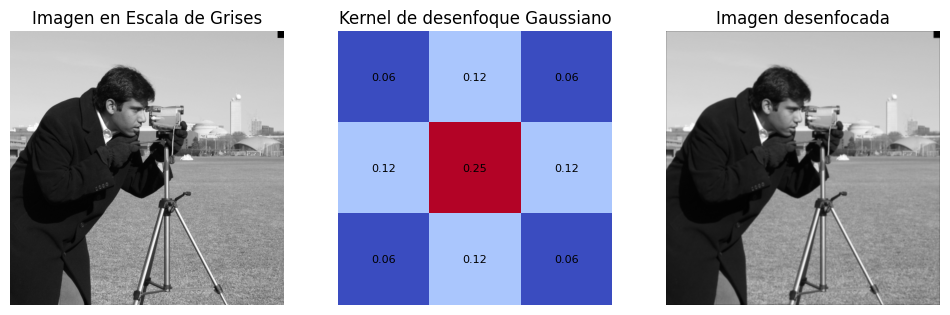

In [ ]:
# Kernel Gauss
kernel_gauss = (1/16)*np.array([[1,2,1],
                              [2,4,2],
                              [1,2,1]])
imagen_desenfocada = K_convolucion(image, kernel_gauss)


# Mostrar
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Imagen en grises
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Imagen en Escala de Grises")
axs[0].axis('off')

# kernel
axs[1].imshow(kernel_gauss, cmap='coolwarm', interpolation='nearest')
axs[1].set_title("Kernel de desenfoque Gaussiano")
for (j,i),label in np.ndenumerate(kernel_gauss):
    axs[1].text(i, j, f"{label:.2f}", ha='center', va='center', color='black', fontsize=8)
axs[1].axis('off')

# Imagen procesada
axs[2].imshow(imagen_desenfocada, cmap = 'gray')
axs[2].set_title("Imagen desenfocada")
axs[2].axis('off')

plt.show()

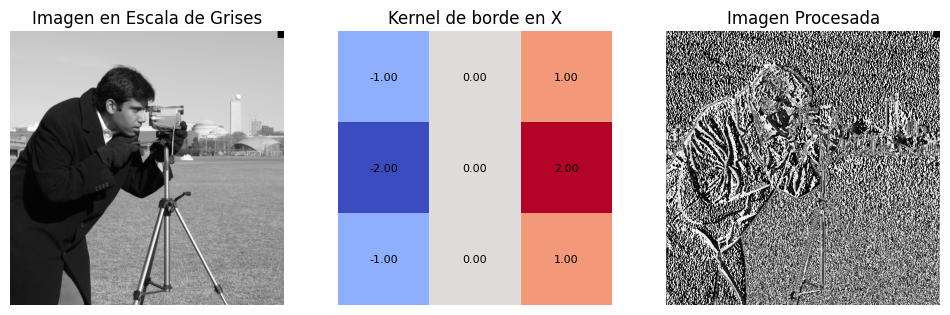

In [ ]:
# Kernel de bordes
kernel_sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
imagen_desenfocada = K_convolucion(image, kernel_sobel_x)


# Mostrar
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Imagen en grises
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Imagen en Escala de Grises")
axs[0].axis('off')

# kernel
axs[1].imshow(kernel_sobel_x, cmap='coolwarm', interpolation='nearest')
axs[1].set_title("Kernel de borde en X")
for (j,i),label in np.ndenumerate(kernel_sobel_x):
    axs[1].text(i, j, f"{label:.2f}", ha='center', va='center', color='black', fontsize=8)
axs[1].axis('off')

# Imagen procesada
axs[2].imshow(imagen_desenfocada, cmap = 'gray')
axs[2].set_title("Imagen Procesada")
axs[2].axis('off')

plt.show()

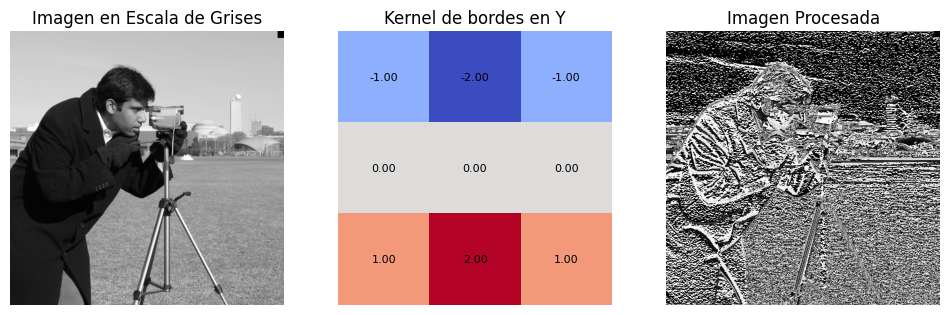

In [ ]:
# Kernel de bordes
kernel_sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
imagen_desenfocada = K_convolucion(image, kernel_sobel_y)


# Mostrar
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Imagen en grises
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Imagen en Escala de Grises")
axs[0].axis('off')

# kernel
axs[1].imshow(kernel_sobel_y, cmap='coolwarm', interpolation='nearest')
axs[1].set_title("Kernel de bordes en Y")
for (j,i),label in np.ndenumerate(kernel_sobel_y):
    axs[1].text(i, j, f"{label:.2f}", ha='center', va='center', color='black', fontsize=8)
axs[1].axis('off')

# Imagen procesada
axs[2].imshow(imagen_desenfocada, cmap = 'gray')
axs[2].set_title("Imagen Procesada")
axs[2].axis('off')

plt.show()

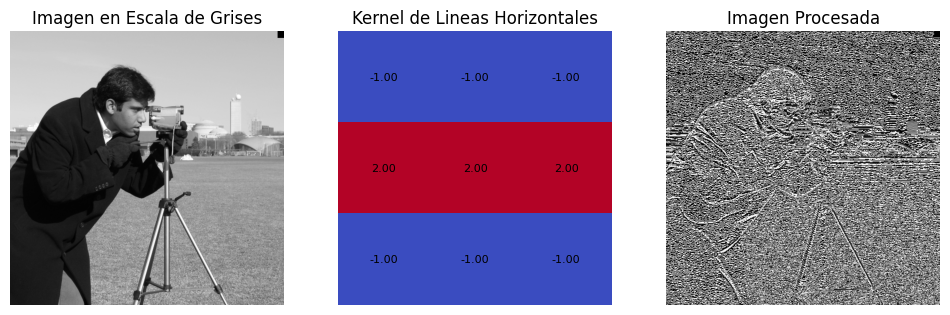

In [ ]:
# Kernel de lineas
kernel_l = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]])
imagen_desenfocada = K_convolucion(image, kernel_l)


# Mostrar
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Imagen en grises
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Imagen en Escala de Grises")
axs[0].axis('off')

# kernel
axs[1].imshow(kernel_l, cmap='coolwarm', interpolation='nearest')
axs[1].set_title("Kernel de Lineas Horizontales")
for (j,i),label in np.ndenumerate(kernel_l):
    axs[1].text(i, j, f"{label:.2f}", ha='center', va='center', color='black', fontsize=8)
axs[1].axis('off')

# Imagen procesada
axs[2].imshow(imagen_desenfocada, cmap = 'gray')
axs[2].set_title("Imagen Procesada")
axs[2].axis('off')

plt.show()

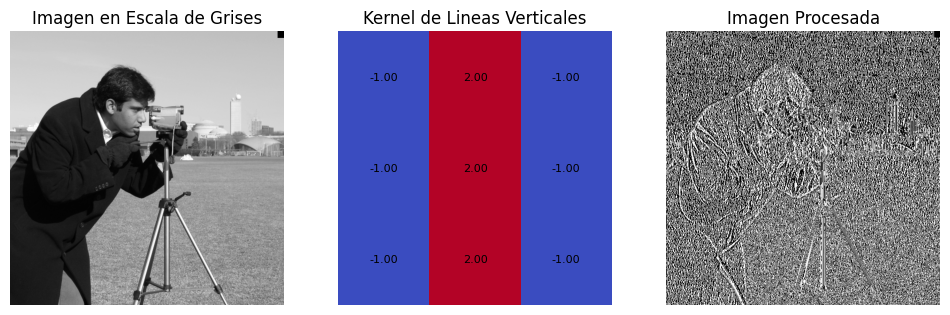

In [ ]:
# Kernel de lineas
kernel_l = np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]])
imagen_desenfocada = K_convolucion(image, kernel_l)


# Mostrar
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Imagen en grises
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Imagen en Escala de Grises")
axs[0].axis('off')

# kernel
axs[1].imshow(kernel_l, cmap='coolwarm', interpolation='nearest')
axs[1].set_title("Kernel de Lineas Verticales")
for (j,i),label in np.ndenumerate(kernel_l):
    axs[1].text(i, j, f"{label:.2f}", ha='center', va='center', color='black', fontsize=8)
axs[1].axis('off')

# Imagen procesada
axs[2].imshow(imagen_desenfocada, cmap = 'gray')
axs[2].set_title("Imagen Procesada")
axs[2].axis('off')

plt.show()

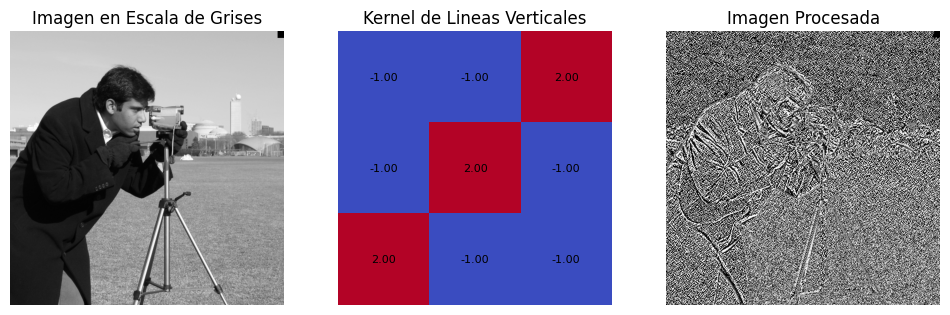

In [ ]:
# Kernel de lineas
kernel_l = np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]])
imagen_desenfocada = K_convolucion(image, kernel_l)


# Mostrar
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Imagen en grises
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Imagen en Escala de Grises")
axs[0].axis('off')

# kernel
axs[1].imshow(kernel_l, cmap='coolwarm', interpolation='nearest')
axs[1].set_title("Kernel de Lineas Verticales")
for (j,i),label in np.ndenumerate(kernel_l):
    axs[1].text(i, j, f"{label:.2f}", ha='center', va='center', color='black', fontsize=8)
axs[1].axis('off')

# Imagen procesada
axs[2].imshow(imagen_desenfocada, cmap = 'gray')
axs[2].set_title("Imagen Procesada")
axs[2].axis('off')

plt.show()

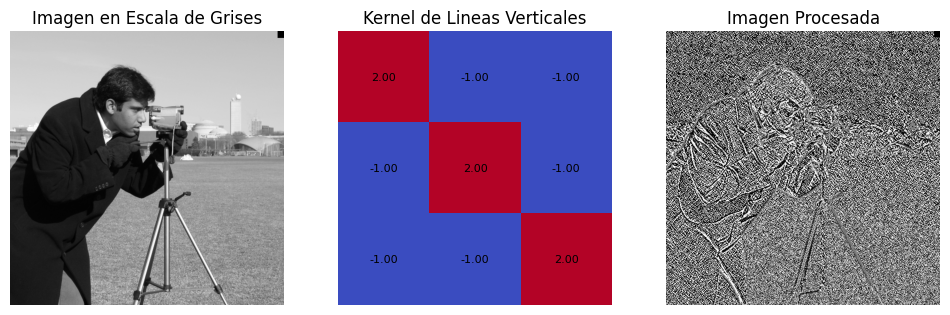

In [ ]:
# Kernel de lineas
kernel_l = np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]])
imagen_desenfocada = K_convolucion(image, kernel_l)


# Mostrar
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Imagen en grises
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Imagen en Escala de Grises")
axs[0].axis('off')

# kernel
axs[1].imshow(kernel_l, cmap='coolwarm', interpolation='nearest')
axs[1].set_title("Kernel de Lineas Verticales")
for (j,i),label in np.ndenumerate(kernel_l):
    axs[1].text(i, j, f"{label:.2f}", ha='center', va='center', color='black', fontsize=8)
axs[1].axis('off')

# Imagen procesada
axs[2].imshow(imagen_desenfocada, cmap = 'gray')
axs[2].set_title("Imagen Procesada")
axs[2].axis('off')

plt.show()

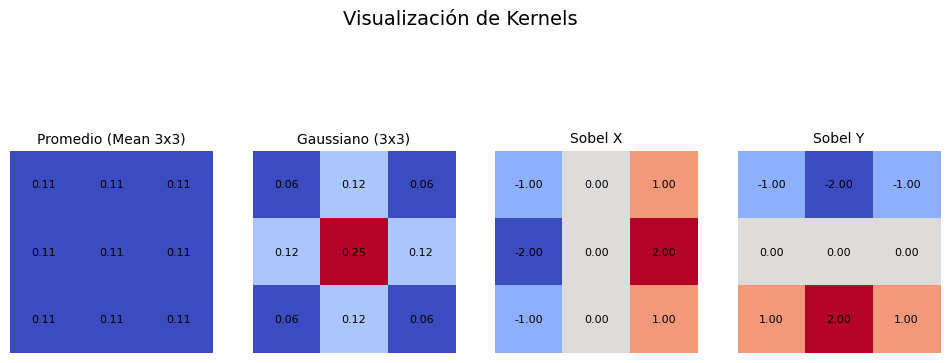

In [ ]:
# Definir kernels
kernels = {
    "Promedio (Mean 3x3)": (1/9)*np.ones((3,3)),
    "Gaussiano (3x3)": (1/16)*np.array([[1,2,1],
                                        [2,4,2],
                                        [1,2,1]]),
    "Sobel X": np.array([[-1,0,1],
                         [-2,0,2],
                         [-1,0,1]]),
    "Sobel Y": np.array([[-1,-2,-1],
                         [ 0, 0, 0],
                         [ 1, 2, 1]]),
}

# Mostrar kernels
fig, axs = plt.subplots(1, len(kernels), figsize=(12,5))

for ax, (name, kernel) in zip(axs, kernels.items()):
    heatmap = ax.imshow(kernel, cmap='coolwarm', interpolation='nearest')
    ax.set_title(name, fontsize=10)
    for (j,i),label in np.ndenumerate(kernel):
        ax.text(i, j, f"{label:.2f}", ha='center', va='center', color='black', fontsize=8)
    ax.axis('off')

plt.suptitle("Visualización de Kernels", fontsize=14)
plt.show()

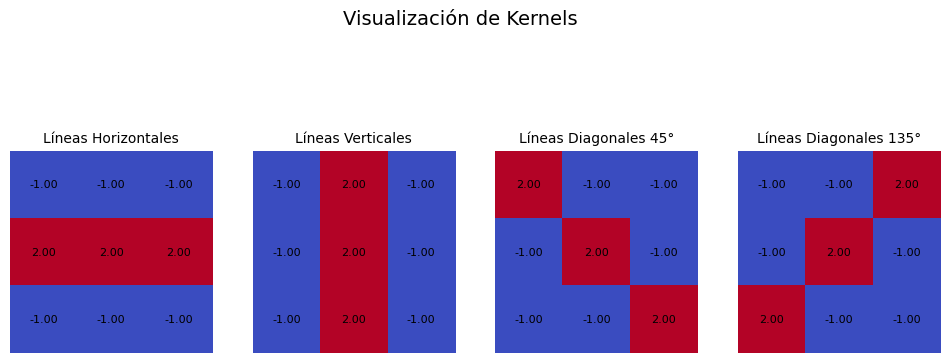

In [ ]:
# Definir kernels
kernels = {
    "Líneas Horizontales": np.array([[-1, -1, -1],
                                     [ 2,  2,  2],
                                     [-1, -1, -1]]),
    "Líneas Verticales": np.array([[-1,  2, -1],
                                   [-1,  2, -1],
                                   [-1,  2, -1]]),
    "Líneas Diagonales 45°": np.array([[ 2, -1, -1],
                                       [-1, 2, -1],
                                       [-1, -1, 2]]),
    "Líneas Diagonales 135°": np.array([[-1, -1, 2],
                                        [-1, 2, -1],
                                        [ 2, -1, -1]])
}

# Mostrar kernels
fig, axs = plt.subplots(1, len(kernels), figsize=(12,5))

for ax, (name, kernel) in zip(axs, kernels.items()):
    heatmap = ax.imshow(kernel, cmap='coolwarm', interpolation='nearest')
    ax.set_title(name, fontsize=10)
    for (j,i),label in np.ndenumerate(kernel):
        ax.text(i, j, f"{label:.2f}", ha='center', va='center', color='black', fontsize=8)
    ax.axis('off')

plt.suptitle("Visualización de Kernels", fontsize=14)
plt.show()

In [ ]:
def trasladar(imagen, tx, ty):
    alto, ancho = imagen.shape
    resultado = np.zeros_like(imagen)

    for y in range(alto):
        for x in range(ancho):
            x_nuevo = x + tx
            y_nuevo = y + ty

            if 0 <= x_nuevo < ancho and 0 <= y_nuevo < alto:
                resultado[y_nuevo, x_nuevo] = imagen[y, x]

    return resultado

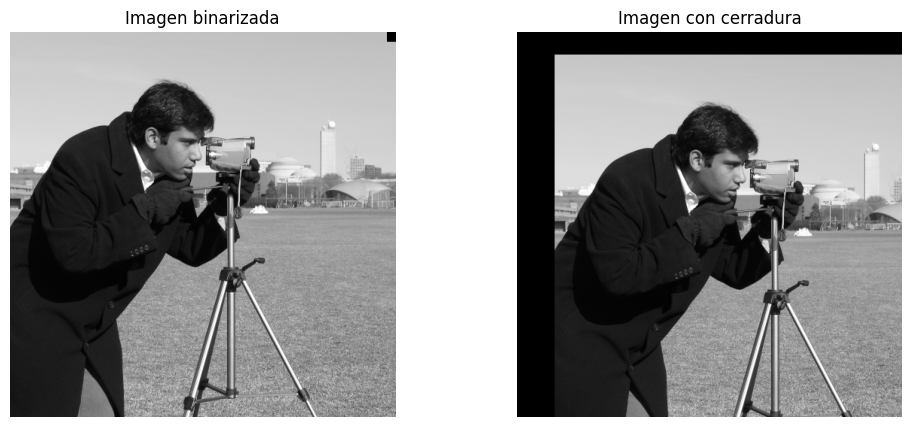

In [ ]:
imagen_trasladada = trasladar(image, tx=50, ty=30)

# Mostrar
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Imagen en grises
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Imagen binarizada")
axs[0].axis('off')

# Imagen Trasladada
axs[1].imshow(imagen_trasladada, cmap='gray')
axs[1].set_title("Imagen con cerradura")
axs[1].axis('off')

plt.show()

In [ ]:
import math

# Rotación
def rotar(imagen, angulo_grados):
    alto, ancho = imagen.shape
    resultado = np.zeros_like(imagen)
    xc, yc = ancho // 2, alto // 2  # centro de la imagen

    theta = math.radians(angulo_grados)  # convertir a radianes
    cos_theta = math.cos(theta)
    sin_theta = math.sin(theta)

    for y in range(alto):
        for x in range(ancho):
            # coordenadas relativas al centro
            x_rel = x - xc
            y_rel = y - yc

            # aplicar rotación inversa
            x_orig = int( cos_theta * x_rel + sin_theta * y_rel + xc )
            y_orig = int(-sin_theta * x_rel + cos_theta * y_rel + yc )

            if 0 <= x_orig < ancho and 0 <= y_orig < alto:
                resultado[y, x] = imagen[y_orig, x_orig]

    return resultado

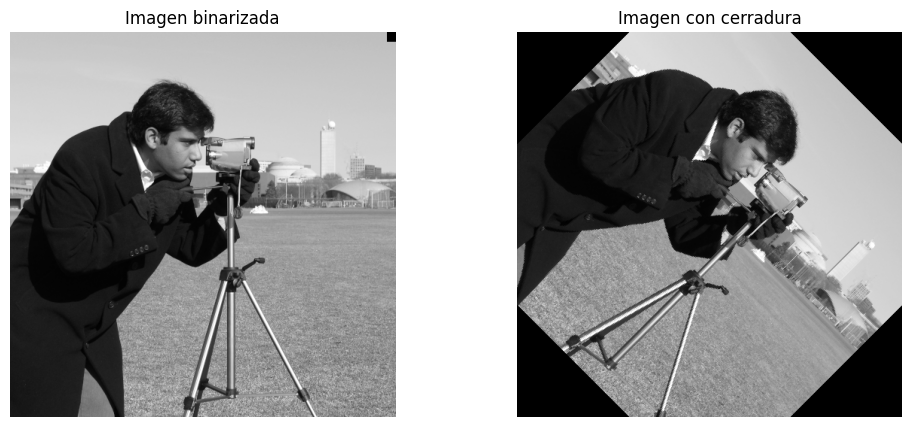

In [ ]:
imagen_rotada = rotar(image, angulo_grados=45)
# Mostrar
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Imagen en grises
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Imagen binarizada")
axs[0].axis('off')

# Imagen rotada
axs[1].imshow(imagen_rotada, cmap='gray')
axs[1].set_title("Imagen con cerradura")
axs[1].axis('off')

plt.show()

In [ ]:
from google.colab import drive

# Montar el Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = path = '/content/drive/My Drive/IPN/Maestria/'
# Correjir el path segun su propio drive

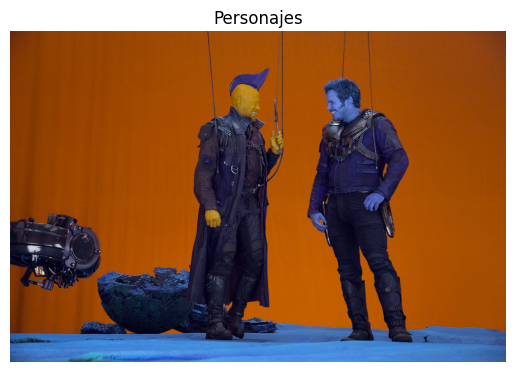

(1000, 1500, 3)


In [ ]:
# Cargar imagen
personajes = cv2.imread(path+'guardianes.jpg')

# Pista: cv2 tiene una forma distinta de organizar los canales

plt.imshow(personajes)
plt.title('Personajes')
plt.axis('off')
plt.show()

print(personajes.shape)

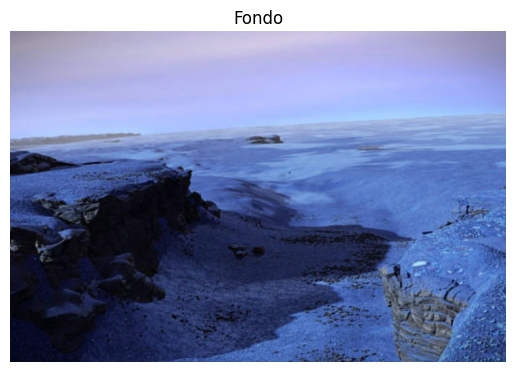

(1000, 1500, 3)


In [54]:
# fondo
fondo = cv2.imread(path+'fondo.jpg')
fondo = cv2.imread(path+'fondo2.webp')


# Pista: cv2 tiene una forma distinta de organizar los canales

# Check if the image was loaded successfully
if fondo is None:
    print(f"Error: Could not load image from {path+'fondo.jpg'}")
    print(f"Value of 'fondo': {fondo}") # Print the value of fondo
else:
    plt.imshow(fondo)
    plt.title('Fondo')
    plt.axis('off')
    plt.show()

    print(fondo.shape)

In [ ]:
# Obtener histogramas por color

In [ ]:
# Segmentar color azul de las pantallas

# Umbralización y binarización (Adaptar)
threshold = 125  # Umbral
threshol2 = 100  # Umbral

imagen_montada = np.zeros_like(image)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):

        if image[i, j] > threshold:
            bin[i, j] = 255
        # elif image [i,j] > threshol2:
        #    bin[i, j] = 100
        else:
            bin[i, j] = 0

In [ ]:
# Copiar imagen del fondo donde quitaron pantalla azul
